In [1]:
# Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
file_path = ("myopia.csv")
myopia_pd = pd.read_csv(file_path)
myopia_pd.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
changed_myopia_pd = myopia_pd.drop(columns = ["MYOPIC"])
changed_myopia_pd

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [4]:
#scale down data
myopia_scaled = StandardScaler().fit_transform(changed_myopia_pd)

In [5]:
#PCA reduction
pca = PCA(n_components=0.9)
myopia_pca = pca.fit_transform(myopia_scaled)
myopia_pca_pd = pd.DataFrame(data=myopia_pca)
myopia_pca_pd2 =  pd.DataFrame(data=myopia_pca)

In [6]:
#further reduce down data with TSNE
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(myopia_pca_pd)

D:\school files\Certificate course\anaconda\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [7]:
tsne_features.shape

(618, 2)

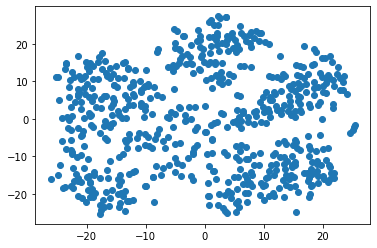

In [8]:
# Prepare to plot the dataset

# The first column of transformed features
myopia_pca_pd['x'] = tsne_features[:,0]

# The second column of transformed features
myopia_pca_pd['y'] = tsne_features[:,1]
plt.scatter(myopia_pca_pd['x'], myopia_pca_pd['y'])
plt.show()

In [31]:
#Some distinct clusters found, however there seems to be a lot of overlap and no real way to determine exact clusters

D:\school files\Certificate course\anaconda\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


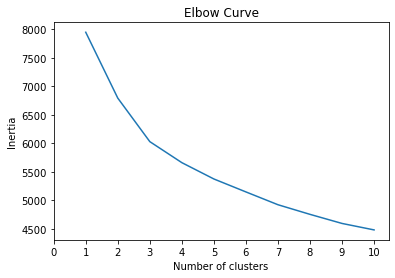

In [12]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_pd2)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
# Predicting clusters with k=10

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(myopia_pca_pd)

# Predict clusters
predictions = model.predict(myopia_pca_pd)

# Add the predicted class column to the dataframe
myopia_pca_pd2["class"] = model.labels_
myopia_pca_pd2.head()

,0,1,2,3,4,5,6,7,8,9,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


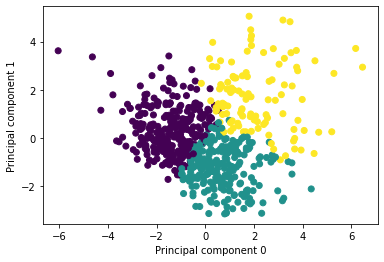

In [10]:
def showclusters(df,x,y):
    plt.scatter(df[x],df[y], c=df['class'])
    plt.xlabel(f'Principal component {x}')
    plt.ylabel(f'Principal component {y}')

showclusters(myopia_pca_pd2,0,1)

In [ ]:
#I believe that the data can be clustered into 3 distinct clusters. In the graph above you can see three distinct groups
# that do have slight overlap, but can still be distinguished.